In [1]:
"""Mount Google Drive to access Drive files"""
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import time
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
!cp -r gdrive/MyDrive/rahnema-dataset /content/rahnema-dataset

In [4]:
def read_dataset():
  for i in range(1,5):
    drop_list = ['RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge']
    if i==1:
      df = pd.read_parquet(f'/content/rahnema-dataset/yellow_tripdata_2023-0{i}.parquet').drop(drop_list + ['airport_fee',], axis=1)
    else:
      temp = pd.read_parquet(f'/content/rahnema-dataset/yellow_tripdata_2023-0{i}.parquet')
      if 'Airport_fee' in temp.columns:
        temp.drop(drop_list + ['Airport_fee',], axis=1, inplace=True)
      else:
        temp.drop(drop_list + ['airport_fee',], axis=1, inplace=True)

      df = df.append(temp)

  return df

In [5]:
df = read_dataset()

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68


In [7]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          326869
trip_distance                 0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
dtype: int64

In [8]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')


In [9]:
df.sort_values('tpep_pickup_datetime', inplace=True)
df = df[df['tpep_pickup_datetime'] > '2023']

In [10]:
def number_of_pickups_in6hour(df):
    pickups_6h = df.set_index(df['tpep_pickup_datetime'])
    # Resample the DataFrame to 6-hour intervals and count the number of pickups
    pickups_6h = pickups_6h.groupby(pd.Grouper(freq='6H')).count()

    return pickups_6h


def number_of_dropoffs_in6hour(df):
    dropoffs_6h = df.set_index(df['tpep_dropoff_datetime'])
    # Resample the DataFrame to 6-hour intervals and count the number of drop-offs
    dropoffs_6h = dropoffs_6h.groupby(pd.Grouper(freq='6H')).count()

    return dropoffs_6h

pickups_6h_df = number_of_pickups_in6hour(df)
dropoffs_6h_df = number_of_dropoffs_in6hour(df)

In [11]:
pickups_6h_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,
2023-01-01 00:00:00,23734,23734,23734,21682,23734,23734,23734,23734,23734,23734,23734,23734,23734,23734,23734
2023-01-01 06:00:00,10778,10778,10778,10296,10778,10778,10778,10778,10778,10778,10778,10778,10778,10778,10778
2023-01-01 12:00:00,24756,24756,24756,24160,24756,24756,24756,24756,24756,24756,24756,24756,24756,24756,24756
2023-01-01 18:00:00,17483,17483,17483,17148,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483
2023-01-02 00:00:00,3612,3612,3612,3475,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612


In [12]:
df.set_index(df['tpep_pickup_datetime'], inplace=True)

In [13]:
# fill the missed passenger count data in each 10-minute interval for each district with the median value for that district.
def passengers_imputation(x):

  missed_passengers = x[x.passenger_count.isna()]
  if len(missed_passengers) != 0:
    median_passengers = x.groupby('PULocationID', as_index=False).median()
    joined_x = pd.merge(missed_passengers, median_passengers, on='PULocationID', how='inner')
    x['passenger_count'].loc[x.passenger_count.isna()] = joined_x['passenger_count_y']
    x['passenger_count'].fillna(0, inplace=True)

  return x


In [14]:
def demand_calculation(x):
  x = passengers_imputation(x)
  passenger_sum = x['passenger_count'].sum()
  pickups_count = x['tpep_pickup_datetime'].count()
  demand = passenger_sum * pickups_count

  if len(x['tpep_pickup_datetime']) != 0:
    first_time = x['tpep_pickup_datetime'].iloc[0]
    pickups_6h_def_filtered = pickups_6h_df.iloc[pickups_6h_df.index < first_time]
    dropoffs_6h_df_filtered = dropoffs_6h_df.iloc[dropoffs_6h_df.index < first_time]


    if len(pickups_6h_def_filtered) > 0 and len(dropoffs_6h_df_filtered) > 0:
        diff = dropoffs_6h_df_filtered.iloc[-1]['tpep_pickup_datetime'] - pickups_6h_def_filtered.iloc[-1]['tpep_dropoff_datetime']

        if diff > 0 :
            return demand + diff

  return demand


In [137]:
# Resample the DataFrame to 10-minute intervals and apply the demand calculation function
df_10m = df.groupby(pd.Grouper(freq='10T')).apply(demand_calculation)

In [138]:
df_10m.drop(df_10m[df_10m == 0].index, inplace=True)

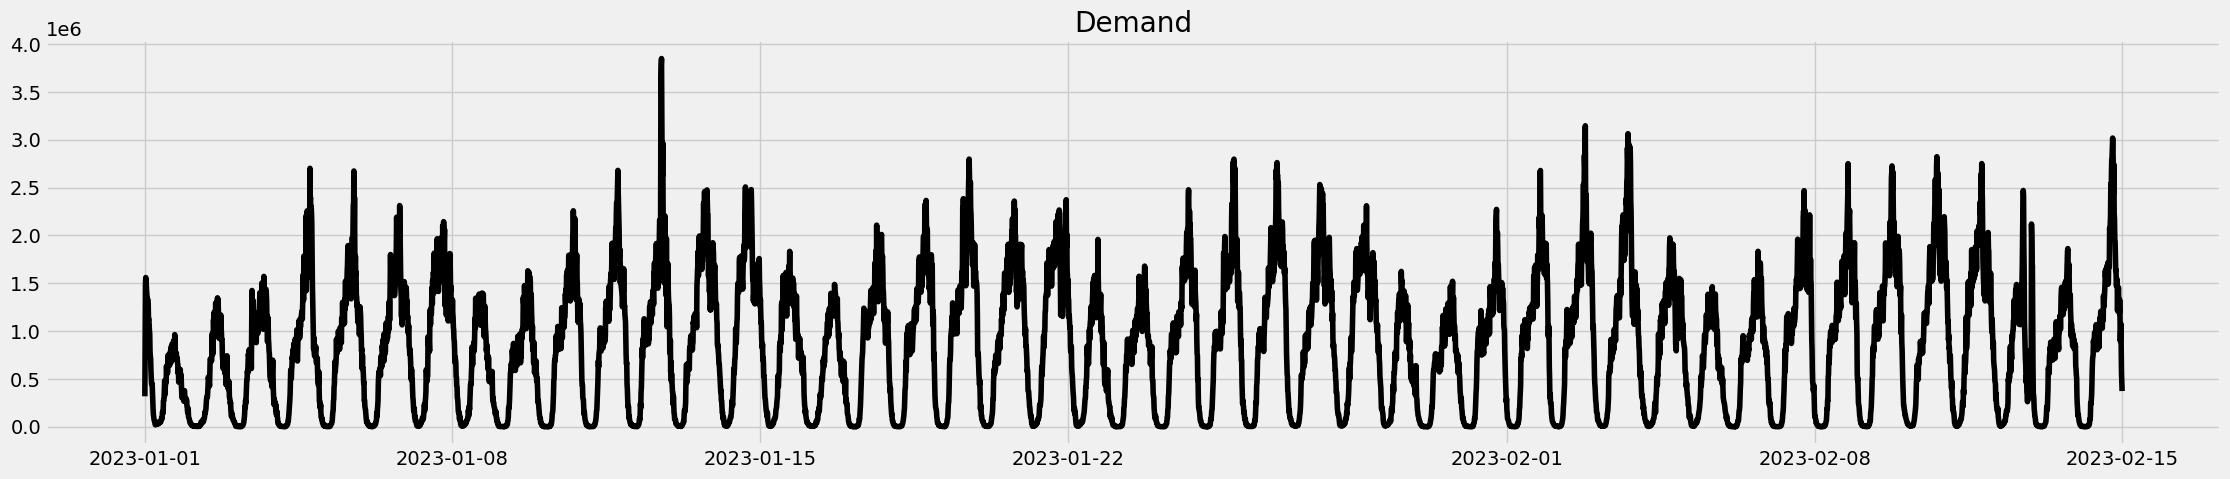

In [139]:
plt.rcParams['figure.figsize']=(25,5)
plt.plot(df_10m[df_10m.index < '2023-2-15 00:00:00'], color='black')
plt.title('Demand')
plt.show();

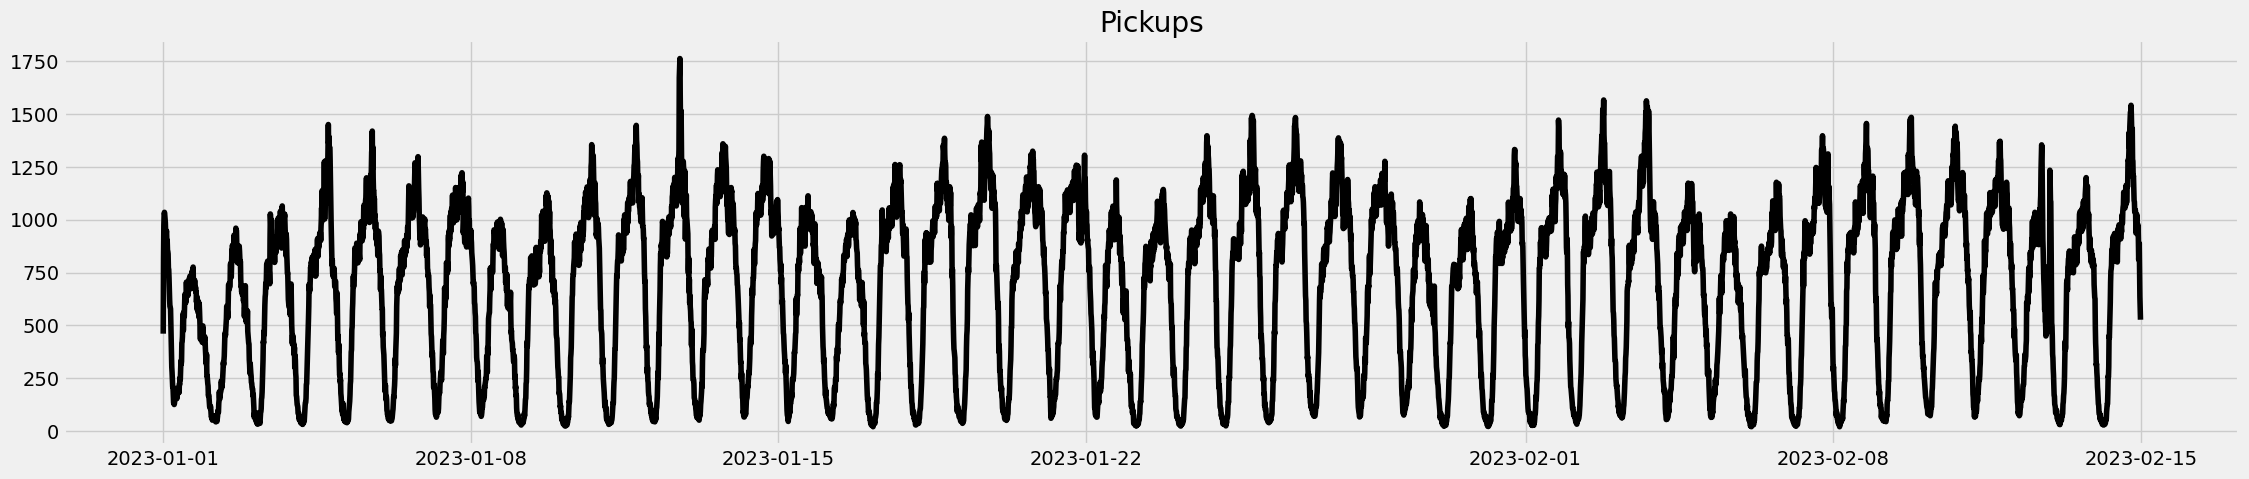

In [140]:
plt.rcParams['figure.figsize']=(25,5)
pickups_10t = df.groupby(pd.Grouper(freq='10T')).count()['tpep_pickup_datetime']
plt.plot(pickups_10t[pickups_10t.index < '2023-2-15 00:00:00'], color='black')
plt.title('Pickups')
plt.show()

In [141]:
from statsmodels.tsa.stattools import adfuller
"""Analyze whether the data is stationary or non-stationary and determine the correlation of the number of lags using the Augmented Dickey-Fuller (ADF) test."""
adfuller(df_10m)

(-27.920647249388946,
 0.0,
 42,
 17277,
 {'1%': -3.430728553675223,
  '5%': -2.8617073059674616,
  '10%': -2.5668590526472244},
 456538.1601971488)

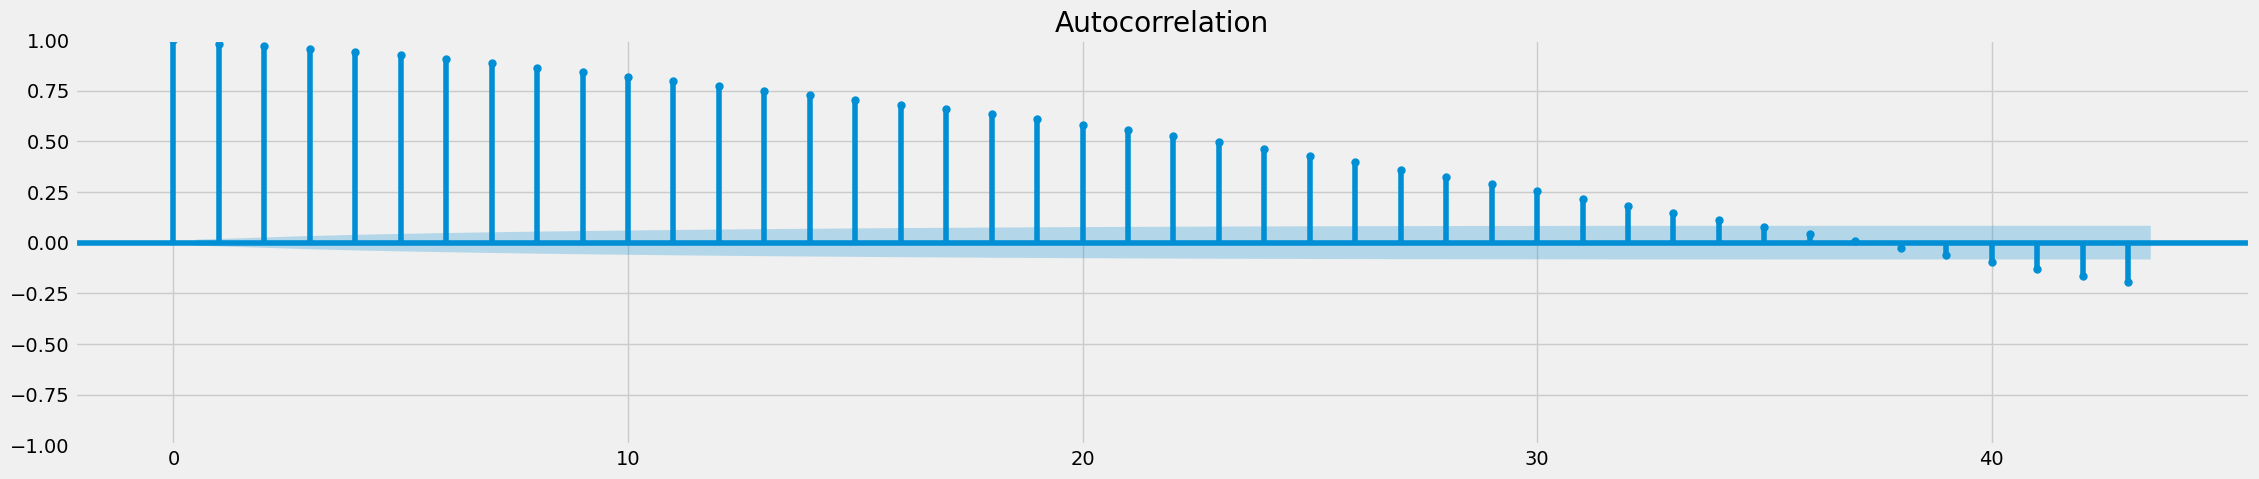

In [142]:
"""Plot autocorrelation function before removing seasonality"""
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_10m);

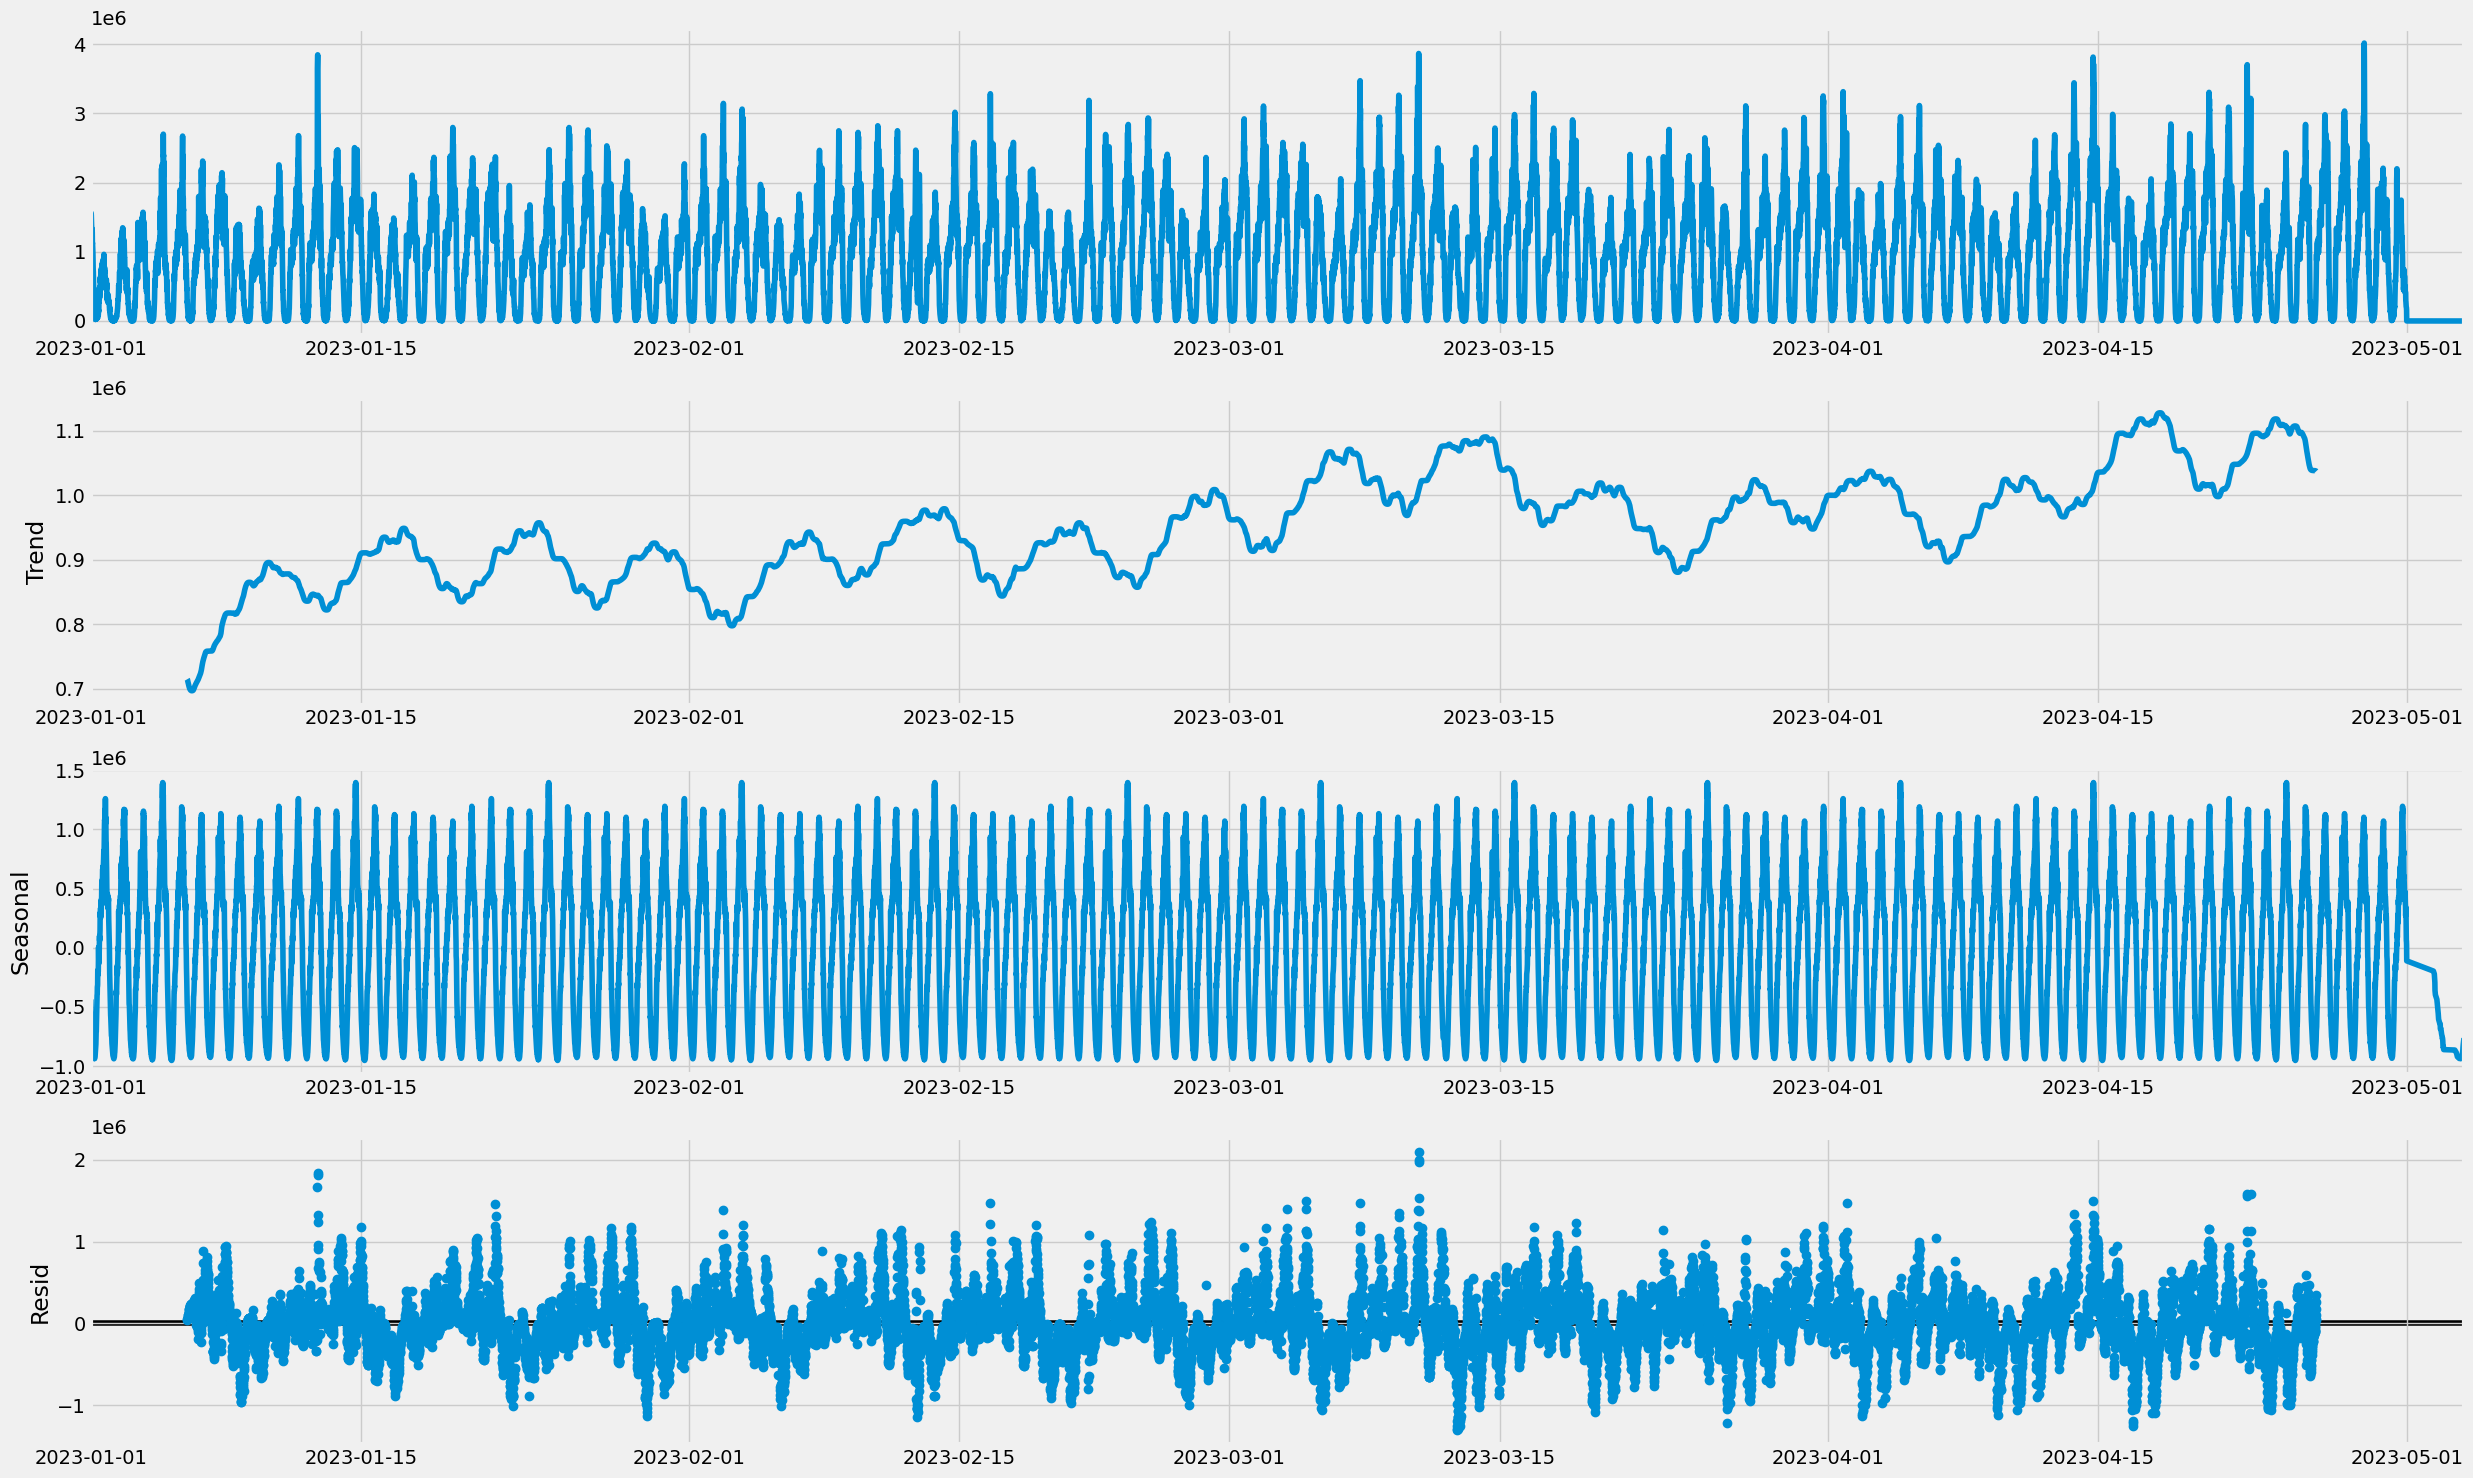

In [164]:
"""Decompose the demand to Trend, Seanal, and Residuals"""
import statsmodels.api as sm
plt.rcParams['figure.figsize']=(25,15)
decomposition = sm.tsa.seasonal_decompose(df_10m, period=60*24)
decomposition.plot();


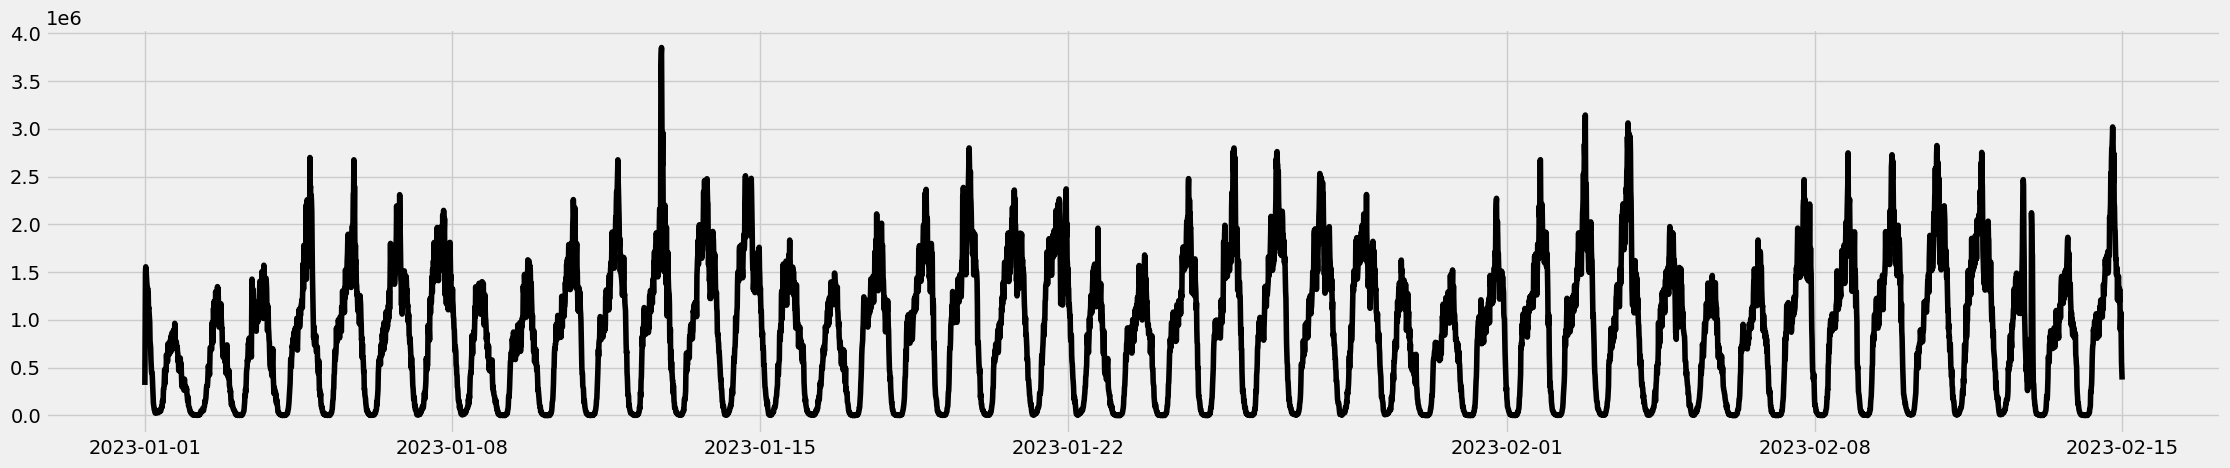

In [144]:
"""The difference between demands and the seasonal decomposed demands"""
plt.rcParams['figure.figsize']=(25,5)
deseasonalized  = df_10m - decomposition.seasonal
plt.plot(deseasonalized [deseasonalized .index < '2023-2-15 00:00:00'], color='black')
plt.show()

In [145]:
"""The number of lags which are correlated to each other after differencing decreasaes to 24 lags from 42"""
adfuller(deseasonalized)

(-27.918496535062893,
 0.0,
 42,
 17277,
 {'1%': -3.430728553675223,
  '5%': -2.8617073059674616,
  '10%': -2.5668590526472244},
 456530.98418730684)

In [146]:
daily_average = df_10m.groupby(df_10m.index.day).mean()
mapped_daily_average = df_10m.index.map(
    lambda x: daily_average.loc[x.day])

In [147]:
deseasonalized_mean = df_10m / mapped_daily_average

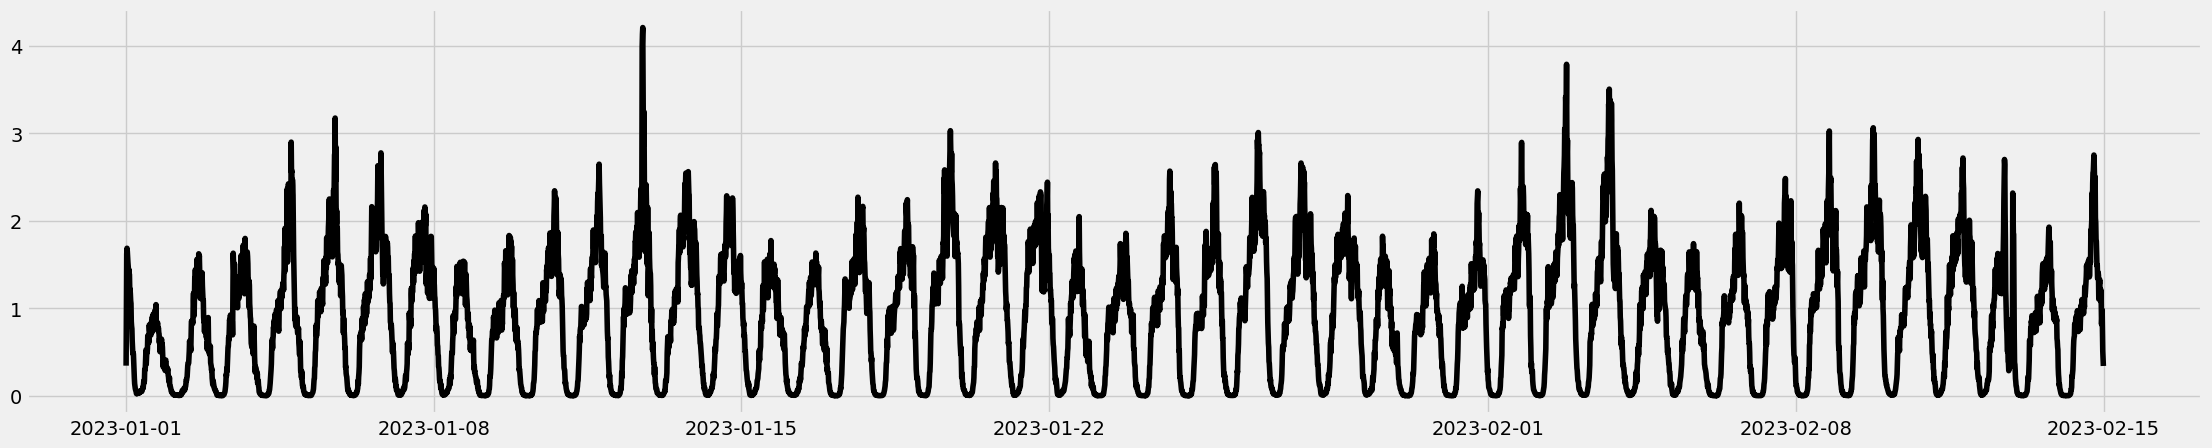

In [148]:
plt.rcParams['figure.figsize']=(25,5)
plt.plot(deseasonalized_mean[deseasonalized_mean.index < '2023-2-15 00:00:00'], color='black')
plt.show()

.

.

.

.

## Analyze the distinctions between the demand for places and the pickups.

In [149]:
location = 137

In [150]:
df_10m_location = df[df['PULocationID'] == location].groupby([pd.Grouper(freq='10T')]).apply(demand_calculation)

In [151]:
"""The frequency of instances where demand equaled zero."""
sum(df_10m_location == 0)

1246

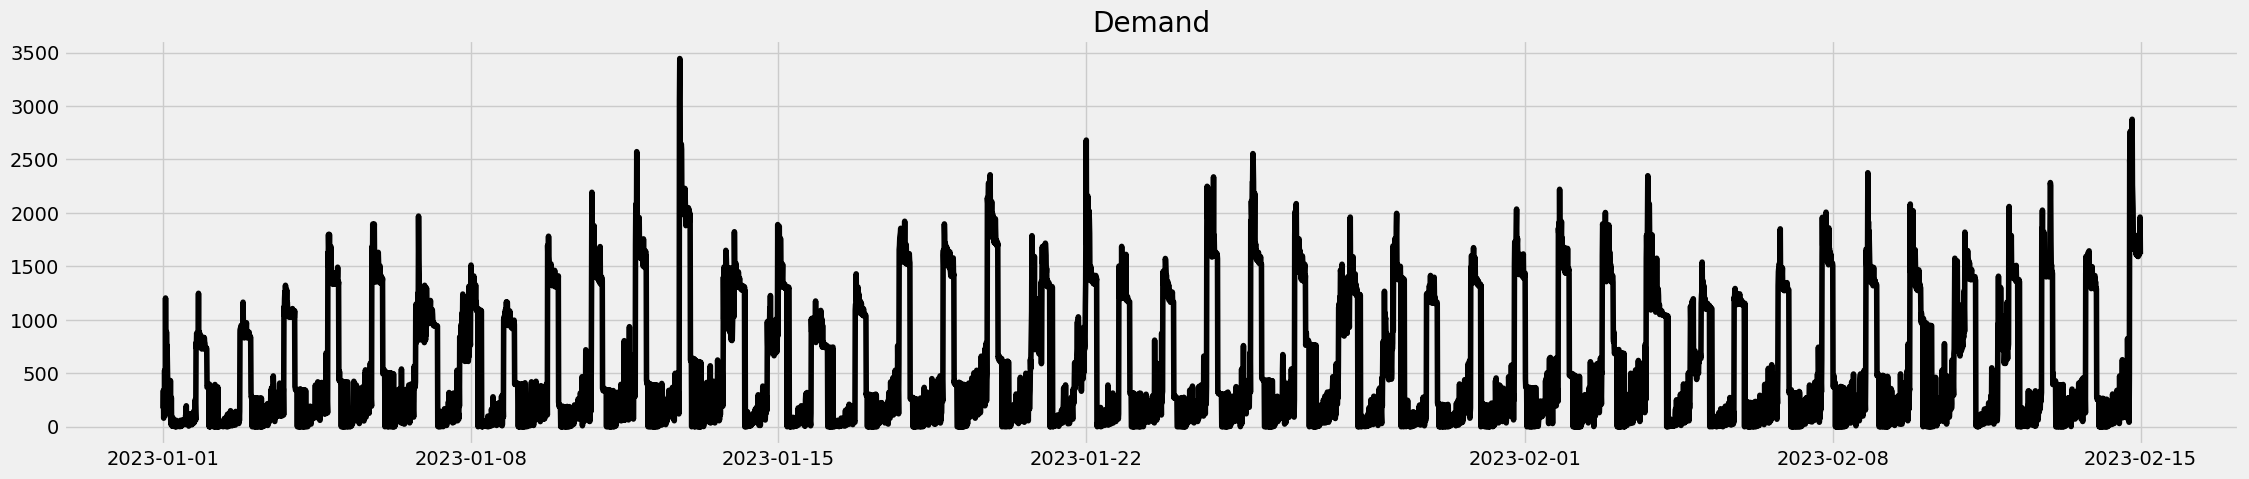

In [152]:
plt.rcParams['figure.figsize']=(25,5)
plt.plot(df_10m_location[df_10m_location.index < '2023-2-15 00:00:00'], color='black')
plt.title('Demand')
plt.show();

In [153]:
adfuller(df_10m_location)

(-20.335384698613794,
 0.0,
 44,
 17235,
 {'1%': -3.4307294763107494,
  '5%': -2.861707713710339,
  '10%': -2.566859269682756},
 237553.07585752447)

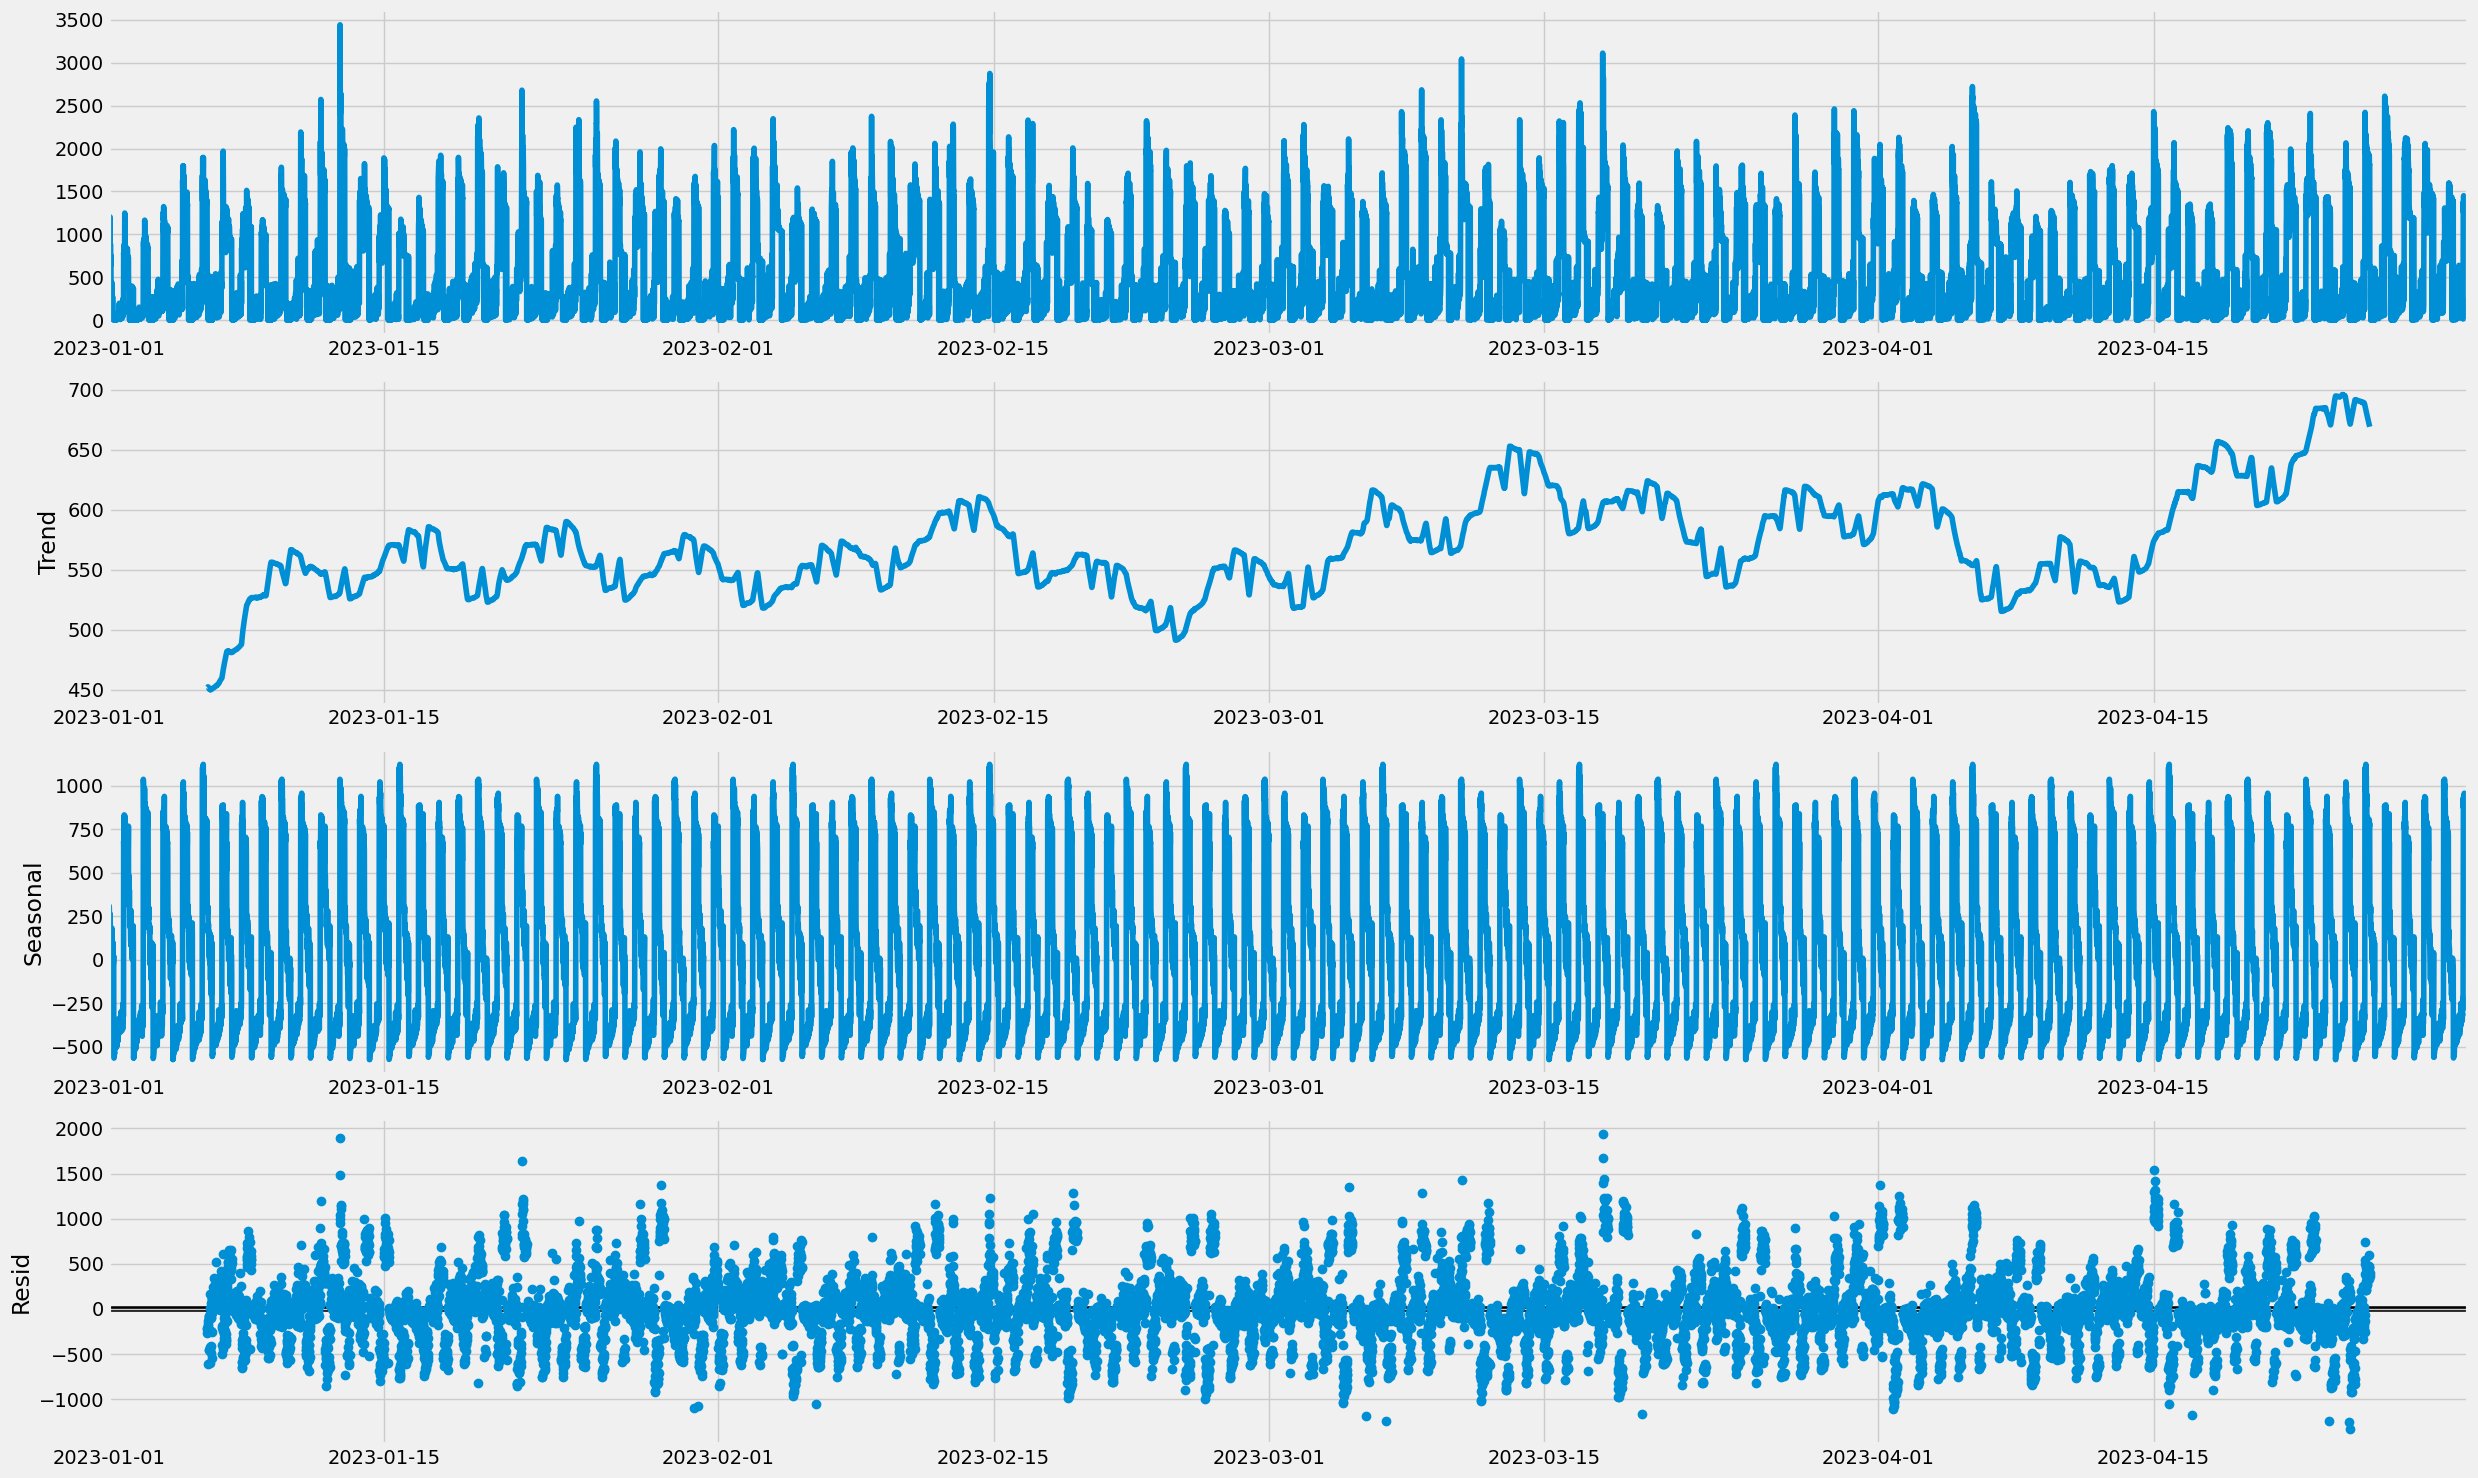

In [154]:
plt.rcParams['figure.figsize']=(25,15)
decomposition_location_demand = sm.tsa.seasonal_decompose(df_10m_location, model='additive', period=24*60)
decomposition_location_demand.plot();

In [155]:
diff_location_demand = df_10m_location - decomposition_location_demand.seasonal

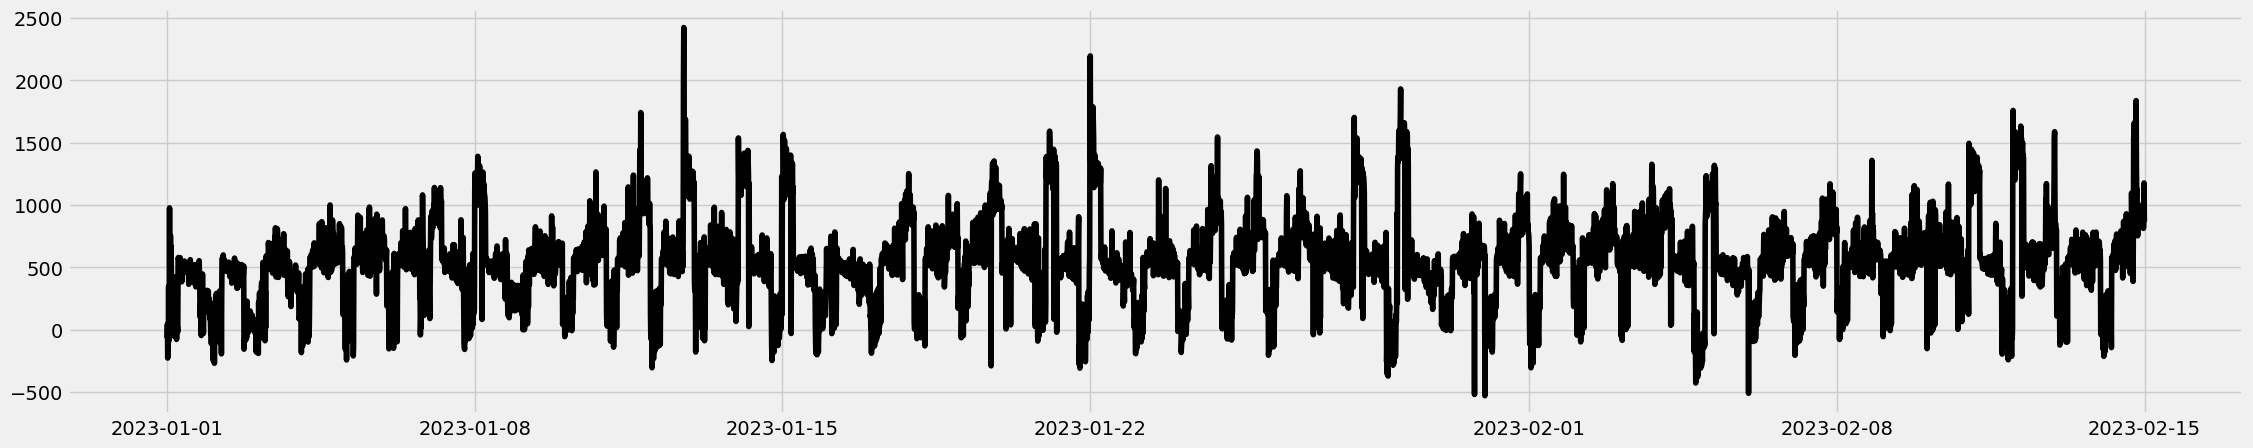

In [156]:
plt.rcParams['figure.figsize']=(25,5)
plt.plot(diff_location_demand[diff_location_demand.index < '2023-2-15 00:00:00'], color='black')
plt.show()

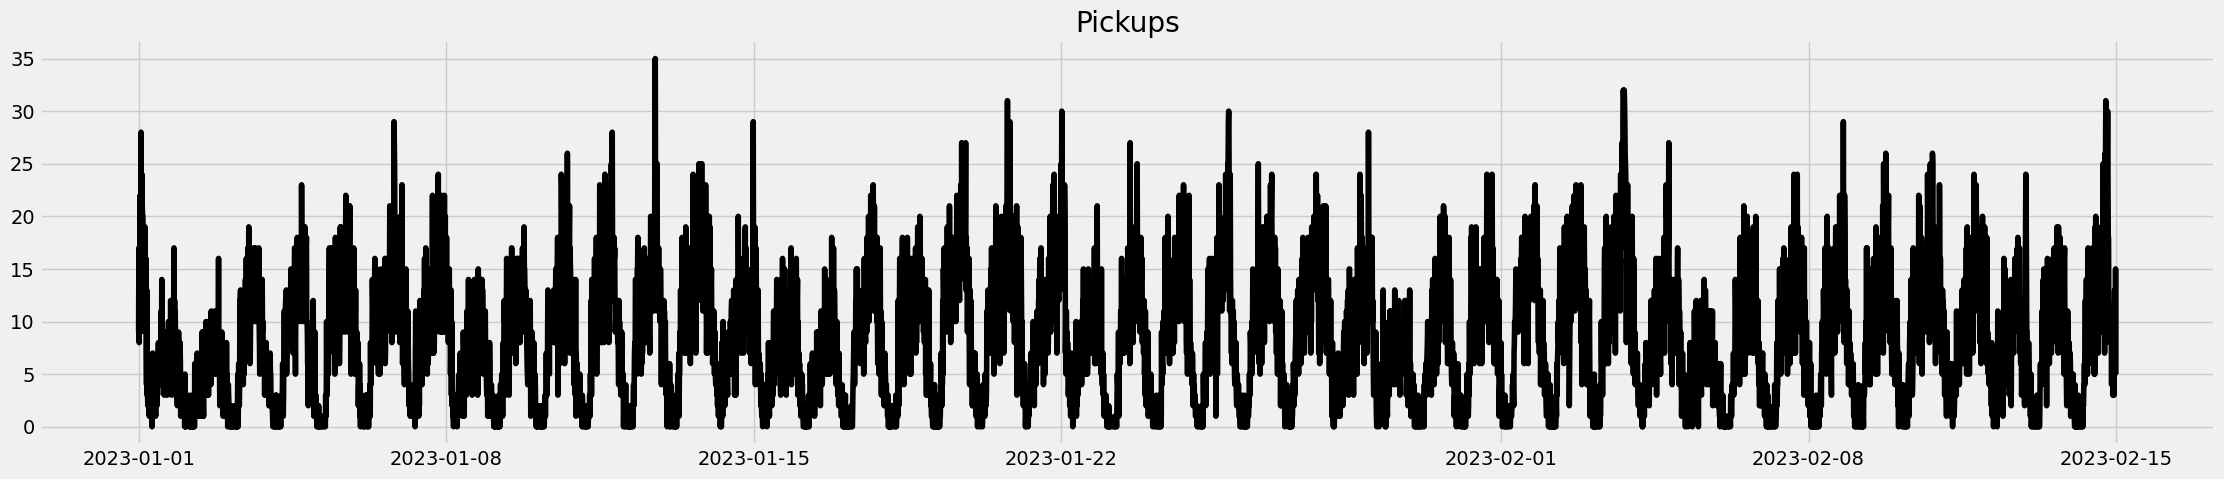

In [157]:
plt.rcParams['figure.figsize']=(25,5)
pickups_10t_location = df[df['PULocationID'] == location].groupby(pd.Grouper(freq='10T')).count()['tpep_pickup_datetime']
plt.plot(pickups_10t_location[pickups_10t_location.index < '2023-2-15 00:00:00'], color='black')
plt.title('Pickups')
plt.show()

In [158]:
sum(pickups_10t_location == 0)

1233

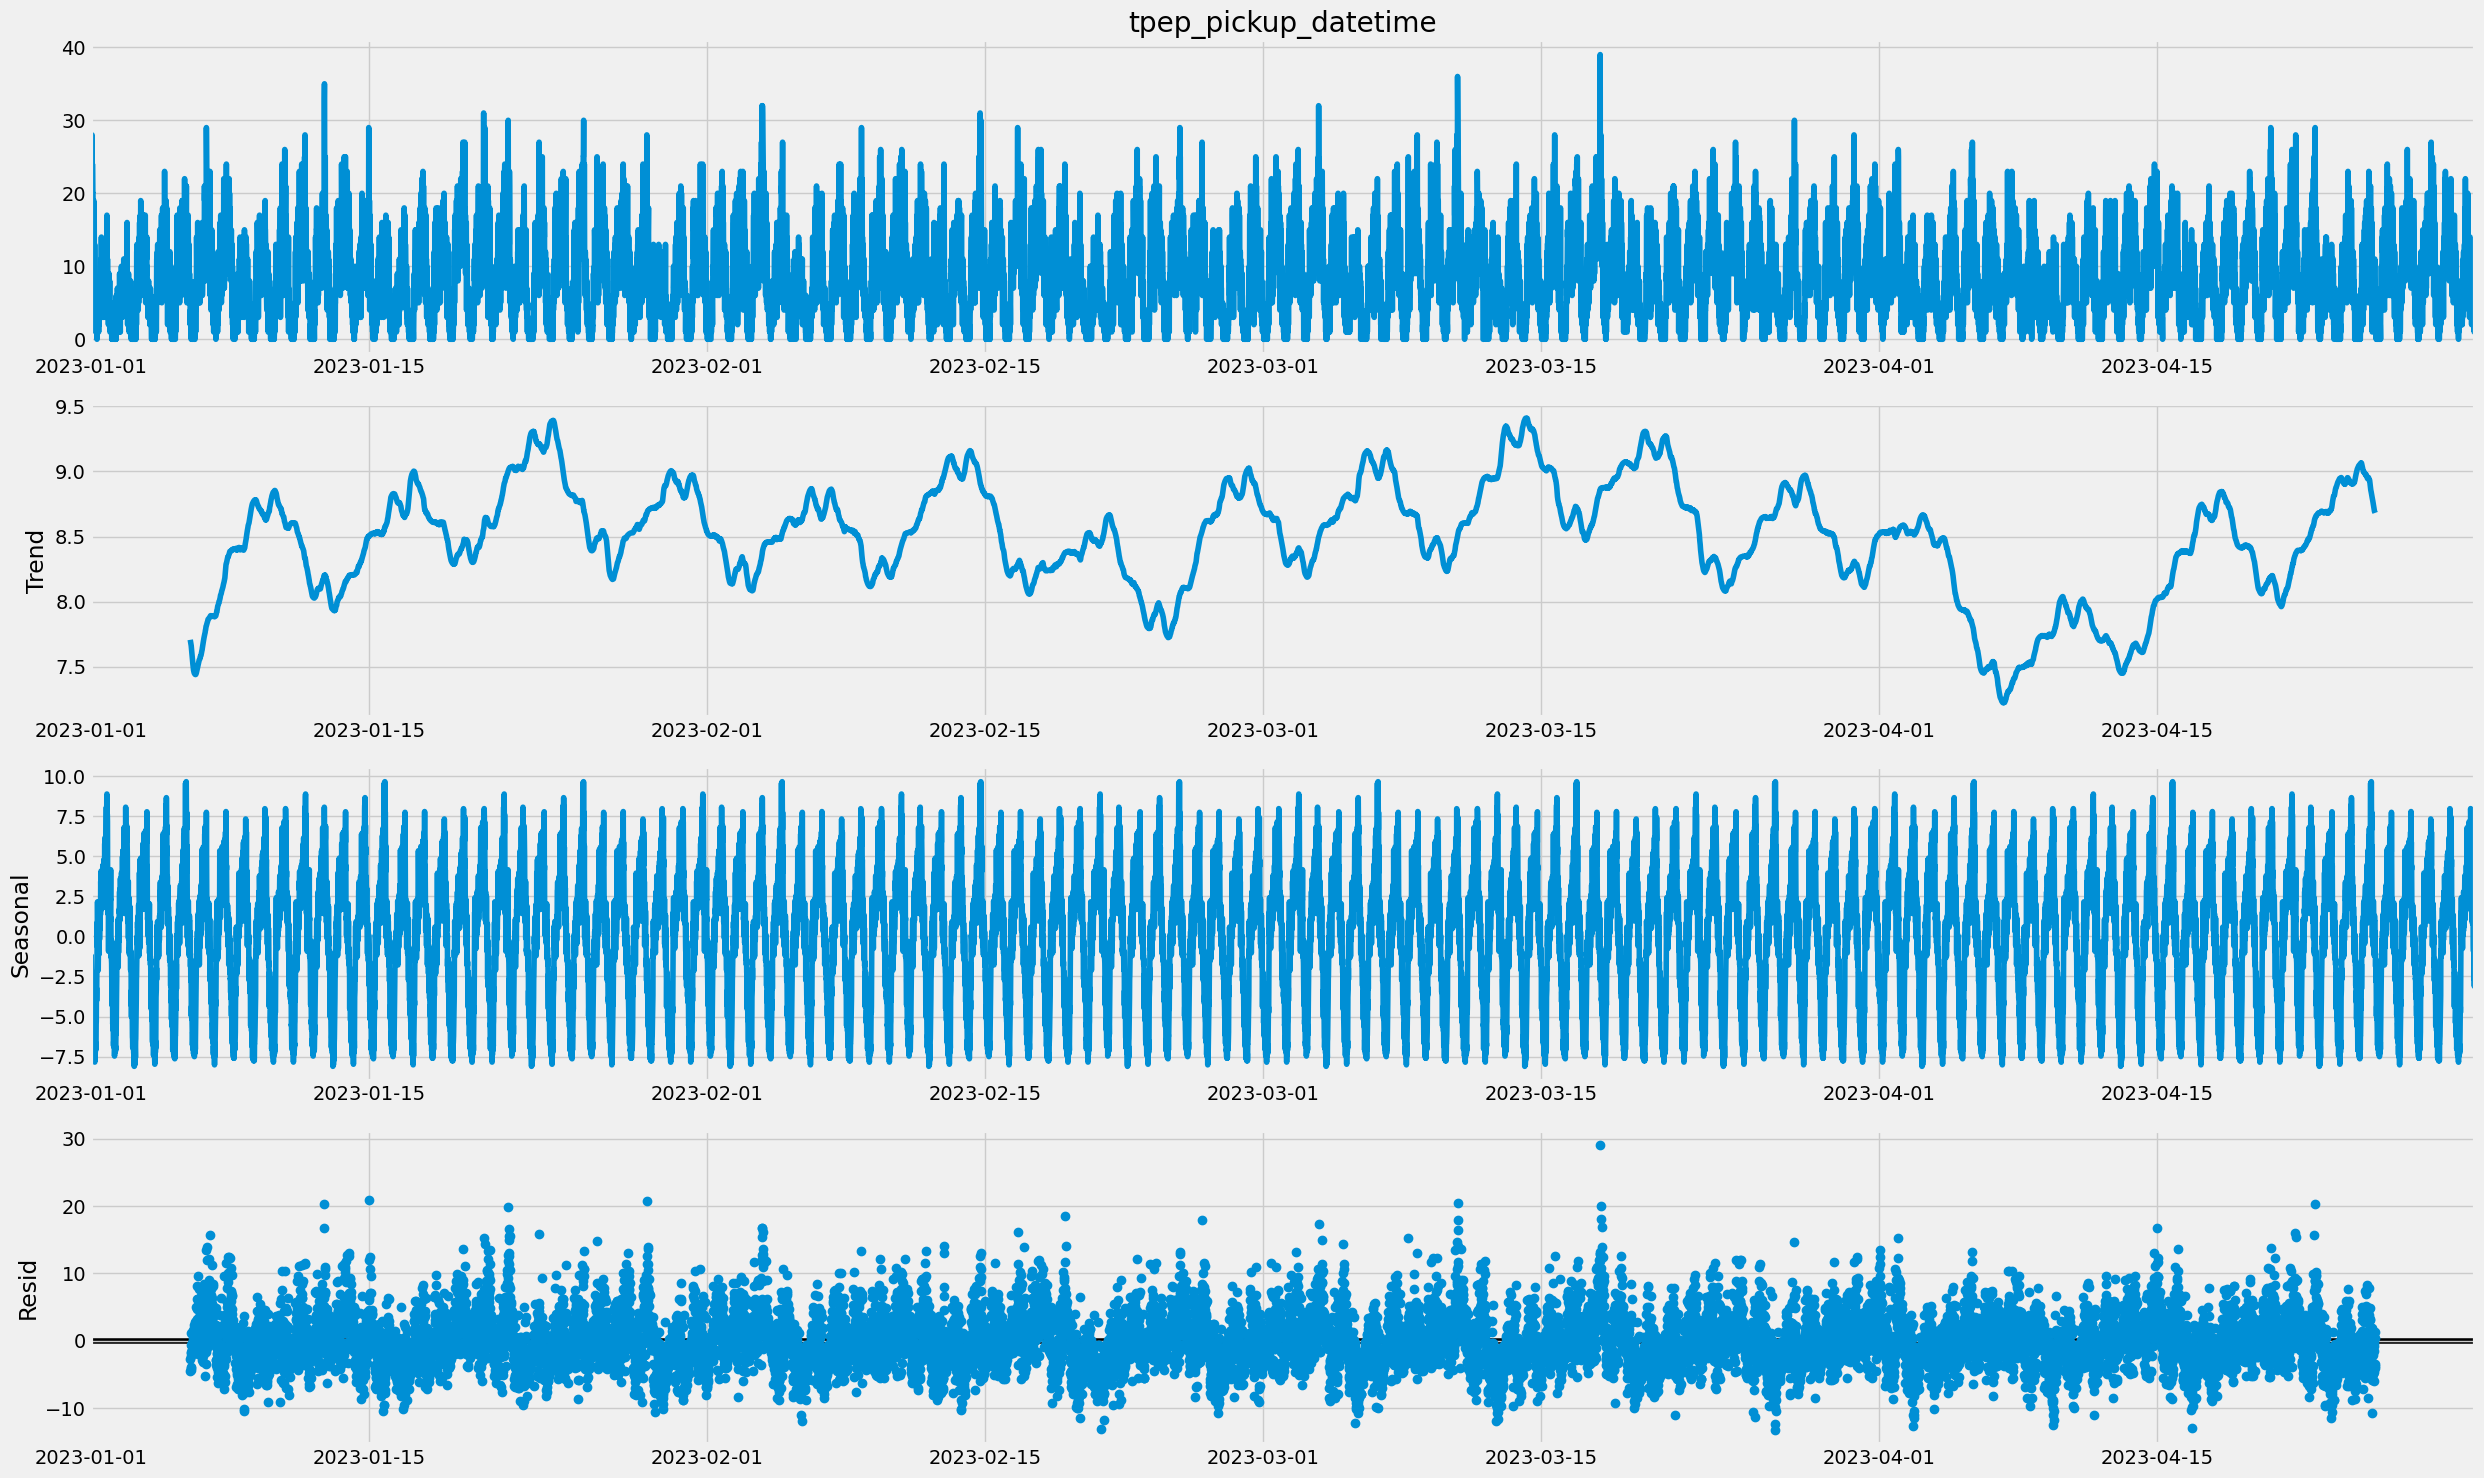

In [159]:
plt.rcParams['figure.figsize']=(25,15)
decomposition = sm.tsa.seasonal_decompose(pickups_10t_location, model='additive', period=24*60)
decomposition.plot();

# Time Shifting

In [160]:
df_diff = df_10m.diff(periods=24*6)

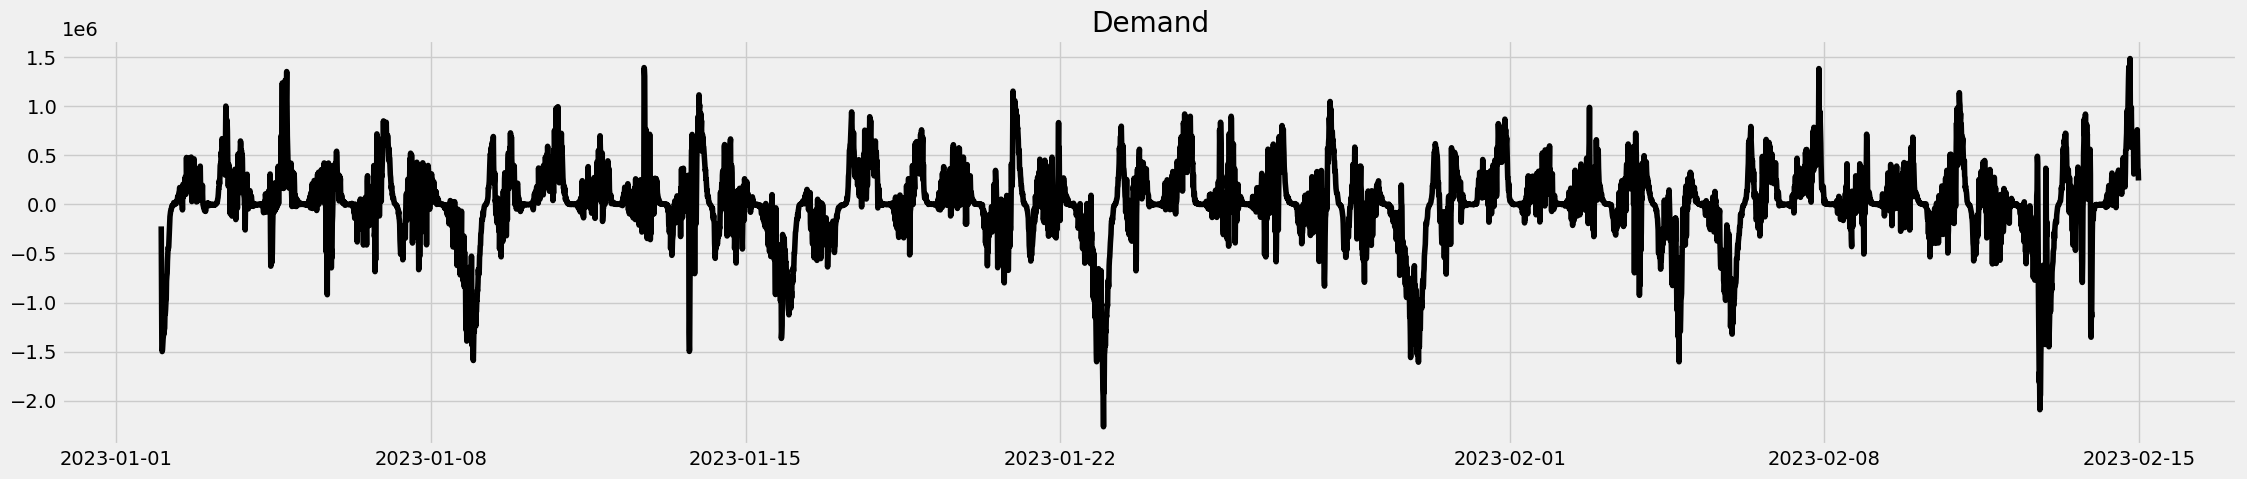

In [161]:
plt.rcParams['figure.figsize']=(25,5)
plt.plot(df_diff[df_diff.index < '2023-2-15 00:00:00'], color='black')
plt.title('Demand')
plt.show();

In [162]:
pickups_10t_diff = df_10m.diff(periods=24*6)

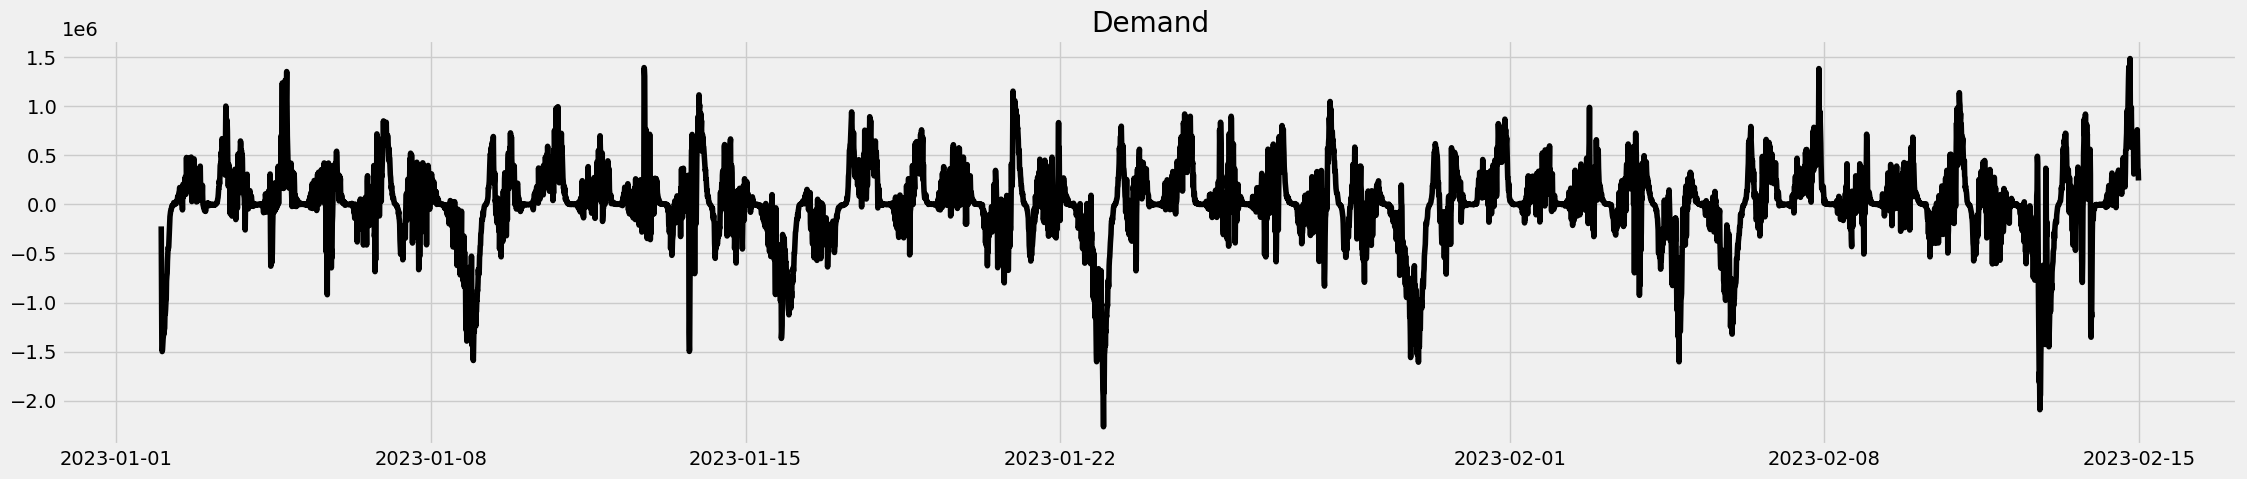

In [163]:
plt.rcParams['figure.figsize']=(25,5)
plt.plot(pickups_10t_diff[pickups_10t_diff.index < '2023-2-15 00:00:00'], color='black')
plt.title('Demand')
plt.show();